# Machine learning model to predict heart failure in Pakistan

Hello! I am Shayaan and in this project I will be making a machine learning model that can predict if someone's heart is going to fail or not. I am aiming to achieve atleast 99% accuracy. The reason I chose to work on this is because a lot of people who I knew in Pakistan died of heart failure. I hope that if I can make a prediction model with high accuracy, doctors might be able to save people from dying due to heart failure.

I obtained this data from Kaggle (https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital)


In [398]:
!pip3 install jupyter ipython

In [399]:
!pip install scikit-learn

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [401]:
heart_failure = pd.read_csv("https://opendata.com.pk/dataset/aa29e8ea-a940-4999-82c5-435998eadb74/resource/cfb87734-bf91-4138-b48a-50fb68b1e2ce/download/the-heart-failure-prediction-pakistan.csv")
heart_failure.head(20)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
5,56,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.9,2,2,7,2,1,NO,0,1,32
6,57,51-60,Female,RURAL,MARRIED,YES,YES,PAID,YES,YES,...,0.2,2,0,7,1,1,NO,0,0,60
7,57,51-60,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,0.0,2,1,3,1,1,NO,0,1,3
8,58,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.0,1,2,3,3,1,NO,0,0,15
9,58,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.8,2,2,6,2,1,NO,0,0,6


In [402]:
len(heart_failure)

368

In [403]:
heart_failure.isna().sum()

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

In [404]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [405]:
np.random.seed(11)

heart_failure_encoded = heart_failure.copy()

for column in heart_failure_encoded.columns:
    if heart_failure_encoded[column].dtype == 'object':
        dummies = pd.get_dummies(heart_failure_encoded[column], prefix=column)

        heart_failure_encoded = pd.concat([heart_failure_encoded, dummies], axis=1)
        
        heart_failure_encoded.drop(column, axis=1, inplace=True)

        

heart_failure_shuffled = heart_failure_encoded.sample(frac = 1)

X = heart_failure_shuffled.drop('Mortality', axis=1)  
y = heart_failure_shuffled['Mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)

0.972972972972973

In [406]:
def evaluate_preds(y_true, y_preds, estimator, X, y):
    """
    A function that provides the accuracy score, classification report, and confusion matrix for quick 
    evaluations of different models.
    """
    accuracy = accuracy_score(y_true, y_preds)
    report = classification_report(y_true, y_preds)
    confusion_matrix = ConfusionMatrixDisplay.from_estimator(estimator, X, y);

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('')
    print('Classification Report:')
    print(f'{report}')
    print('')
    print('Confusion Matrix:')

Accuracy: 97.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.90      0.95        20

    accuracy                           0.97        74
   macro avg       0.98      0.95      0.96        74
weighted avg       0.97      0.97      0.97        74


Confusion Matrix:


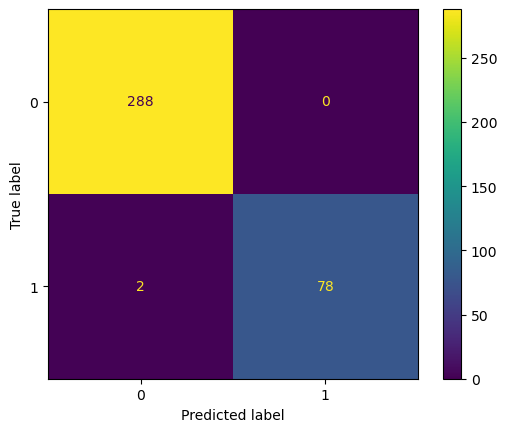

In [407]:
np.random.seed(11)
baseline_metrics = evaluate_preds(y_test, y_preds, clf, X, y)

From the result of the function the key takeway is that the model made mistakes on three instances. All three of those instances were false negatives. This means that the prediction model is predicting that three people who actually had heart failure will not have heart failure.

## Tuning hyperparameters

I will use `Grid Search CV` for hypertuning

In [408]:
from sklearn.model_selection import GridSearchCV

In [409]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [410]:
np.random.seed(11)

X = heart_failure_shuffled.drop('Mortality', axis = 1)
y = heart_failure_shuffled['Mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

grid = {"n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        "bootstrap": [True, False],
        "max_depth": [None, 5, 10, 15, 20, 25, 30],
        "class_weight": [None, "balanced", "balanced_subsample"]
       }

clf = RandomForestClassifier(n_jobs = 1)

gs_clf = GridSearchCV(estimator = clf, 
                      param_grid = grid,
                      cv = 5,
                     verbose = 2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=None, n_estima

[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=400; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=450; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=450; total time=   0.5s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=450; total time=   0.4s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_e

[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_de

[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=25, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=None, max_de

[CV] END bootstrap=True, class_weight=None, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, n_estimators=100; total time=   0.1s
[

[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=350; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, n_estimators=450; total time=   0.2s
[CV] END bootstrap=T

[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=250; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=300; total time=   0.2s
[CV] END b

[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=25, n_estimators=150; total time=   0.1s
[CV] END b

[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=450; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END b

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, cla

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.4s
[CV] END bootstrap=

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=450; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=Tru

[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=None, n_estimators=350; total time=   0.2s
[CV] END bootstrap=F

[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=N

[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=500; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=500; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=500; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=500; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=20, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, 

[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=450; total time=   0.3s
[CV] END bootstrap=False, class_weight=None, max_depth=25, n_estimators=450; total time=   0.3s
[CV] END bootstrap=False, class_weight=N

[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, n_estimators=300;

[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, n_estimators=100; total time=   0.1s
[CV] E

[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=450; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=15, n_estimators=450; total time=   0.2s


[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=25, n_estimators=250; total time=   0.1s


[CV] END bootstrap=False, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=30, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=None, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_w

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=250; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=5, n_estimators=350; total time=   0.2s
[CV] END bootstrap=

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=10, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=100; total time=   0.1s
[CV] END bootst

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=250; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=350; total time=   0.2s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=20, n_estimators=350; total time=   0.2s
[CV] END b

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=25, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=30, n_estimators=100; total time=   0.1s
[CV] END bootst

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             verbose=2)

In [411]:
best_params_t1 = gs_clf.best_params_
best_params_t1

{'bootstrap': False, 'class_weight': None, 'max_depth': 20, 'n_estimators': 50}

Accuracy: 98.65%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.94      1.00      0.97        17

    accuracy                           0.99        74
   macro avg       0.97      0.99      0.98        74
weighted avg       0.99      0.99      0.99        74


Confusion Matrix:


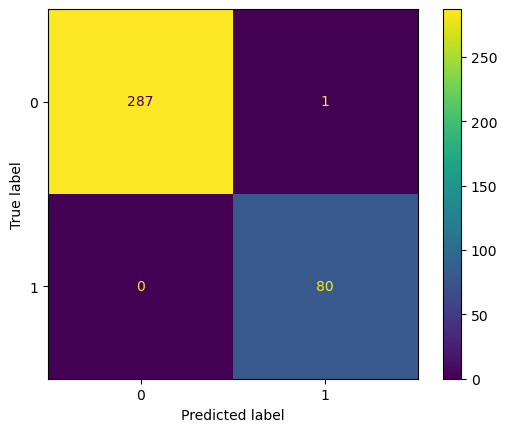

In [412]:
np.random.seed(11)
estimator = RandomForestClassifier(**best_params_t1)
estimator.fit(X_train, y_train)
gs_y_preds = estimator.predict(X_test)
estimator.score(X_test, y_test)
tuning_1 = (evaluate_preds(y_test, gs_y_preds, estimator, X, y))

In [413]:
np.random.seed(11)

X = heart_failure_shuffled.drop('Mortality', axis = 1)
y = heart_failure_shuffled['Mortality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

grid_2 = {"n_estimators": [50],
          "max_leaf_nodes": [None, 10, 50, 100],
          "bootstrap": [False],
          "max_depth": [20],
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 5, 10],
          "max_features": ["sqrt", "auto"]
         }

clf = RandomForestClassifier(n_jobs = 1)

gs2_clf = GridSearchCV(estimator = clf,
            param_grid = grid_2,
            scoring = 'f1',
            cv = 5,
            verbose = 2)
gs2_clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_no

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt,

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=aut

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=au

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_featu

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_no

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_lea

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_no

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_le

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_l

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_no

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_no

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_l

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, 

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_l

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, 

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_l

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto,

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto,

/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=10, n_estimators=50; total time=   0.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': ['sqrt', 'auto'],
                         'max_leaf_nodes': [None, 10, 50, 100],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50]},
             scoring='f1', verbose=2)

In [414]:
best_params_t2 = gs2_clf.best_params_
best_params_t2

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        17

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74


Confusion Matrix:


/Users/shayaan/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


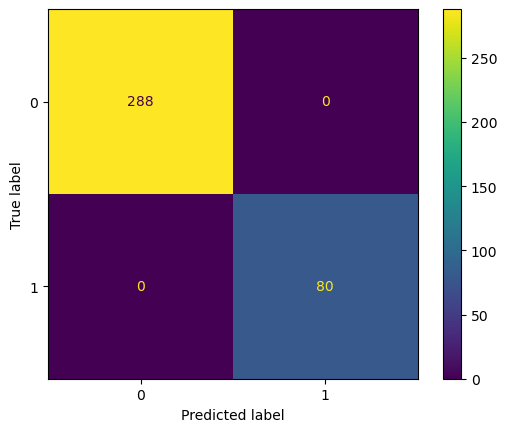

In [415]:
np.random.seed(11)
estimator = RandomForestClassifier(**best_params_t2)
estimator.fit(X_train, y_train)
gs2_y_preds = estimator.predict(X_test)
tuning_2 = evaluate_preds(y_test, gs2_y_preds, estimator, X, y)